In this project I'll explore the file "Superstore" using different Python libraries, like Pandas and Seaborn. I'll create data visualizations to find patterns and insights in the data.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set graphics' styles

In [30]:
sns.set_style(style='whitegrid')
plt.rcParams['figure.figsize'] = (11, 9.4) # rc means runtime configuration

Importing data

In [4]:
data = pd.read_excel('../data/superstore.xlsm')
data.loc[0:5,['Segment', 'Country','City',]]

,Segment,Country,City
0,Consumer,United States,Henderson
1,Consumer,United States,Henderson
2,Corporate,United States,Los Angeles
3,Consumer,United States,Fort Lauderdale
4,Consumer,United States,Fort Lauderdale
5,Consumer,United States,Los Angeles


Data general information

In [6]:
data.info()
#Another option to get only dtypes: data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Are there null values in any column?

In [9]:
data.isnull().sum().sort_values(ascending=False)

Row ID           0
Postal Code      0
Discount         0
Quantity         0
Sales            0
Product Name     0
Sub-Category     0
Category         0
Product ID       0
Region           0
State            0
Order ID         0
City             0
Country          0
Segment          0
Customer Name    0
Customer ID      0
Ship Mode        0
Ship Date        0
Order Date       0
Profit           0
dtype: int64

If it doesn't have null values, there is no need to execute data.dropna()

In [11]:
data.describe(include=[np.number])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
data.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


There is no orders outside the United States.

In [ ]:
data[~(data['Country'] == 'United States')]

Testing apply function

In [15]:
data_sample = data.loc[0:5,['Segment', 'Country','City','Sales','Discount','Profit']]
data_sample['Profit_2'] = data_sample.apply(lambda x: x['Profit'] if x['City'] == 'Henderson' else 0, axis = 1)
data_sample

,Segment,Country,City,Sales,Discount,Profit,Profit_2
0,Consumer,United States,Henderson,261.9600,0.00,41.9136,41.9136
1,Consumer,United States,Henderson,731.9400,0.00,219.5820,219.5820
2,Corporate,United States,Los Angeles,14.6200,0.00,6.8714,0.0000
3,Consumer,United States,Fort Lauderdale,957.5775,0.45,-383.0310,0.0000
4,Consumer,United States,Fort Lauderdale,22.3680,0.20,2.5164,0.0000
5,Consumer,United States,Los Angeles,48.8600,0.00,14.1694,0.0000


Using groupby function to get the count of a differente categoric variables

In [26]:
data.groupby('Ship Mode')['Ship Mode'].count().sort_values(ascending=False)
#More simple: data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [32]:
data.groupby('Segment')['Segment'].count().sort_values(ascending=False)

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Bar chart group by Segment

/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


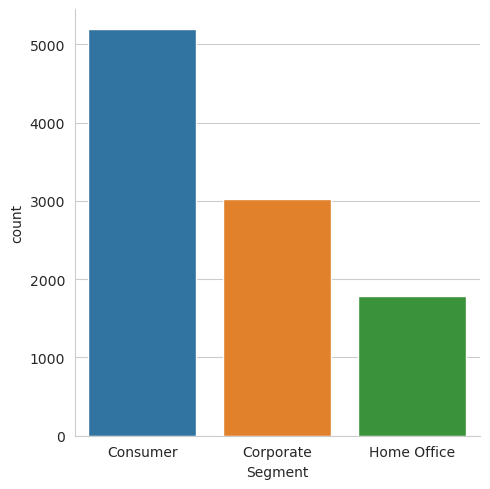

In [52]:
#Pyplot
#data.Segment.value_counts().plot(kind='bar')

#Seaborn
sns.catplot(data=data, x='Segment',kind='count')

#Another option using Seaborn
# data.value_counts('Segment').reset_index(name='count').pipe(lambda df: sns.barplot(data=df, x='Segment',y='count'))

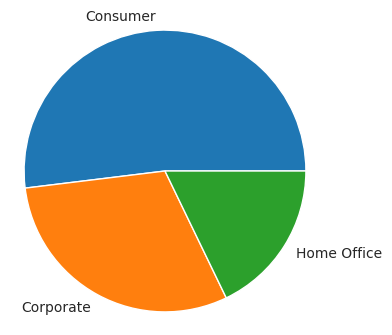

In [59]:
plt.figure(figsize=(4,4))
data_by_segment = data.value_counts('Segment').reset_index()
plt.pie(data_by_segment['count'], labels=data_by_segment['Segment'])
plt.axis('equal')
plt.show()

Another option to show the proportions

Which product category has more orders?

In [11]:
data.groupby(['Category'])['Category'].count().sort_values(ascending=False)

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Category, dtype: int64

Which product subcategory has more orders?

In [22]:
data.groupby(['Category','Sub-Category'])['Category'].count().sort_values(ascending=False)

Category         Sub-Category
Office Supplies  Binders         1523
                 Paper           1370
Furniture        Furnishings      957
Technology       Phones           889
Office Supplies  Storage          846
                 Art              796
Technology       Accessories      775
Furniture        Chairs           617
Office Supplies  Appliances       466
                 Labels           364
Furniture        Tables           319
Office Supplies  Envelopes        254
Furniture        Bookcases        228
Office Supplies  Fasteners        217
                 Supplies         190
Technology       Machines         115
                 Copiers           68
Name: Category, dtype: int64

In [21]:
data.groupby(['Region','State','City'])['Region'].count().sort_values(ascending=False)

Region  State         City         
East    New York      New York City    915
West    California    Los Angeles      747
East    Pennsylvania  Philadelphia     537
West    California    San Francisco    510
        Washington    Seattle          428
                                      ... 
South   Florida       Kissimmee          1
                      Jupiter            1
        Arkansas      Springdale         1
                      Rogers             1
West    Wyoming       Cheyenne           1
Name: Region, Length: 604, dtype: int64

In [20]:
len(data['City'].unique())

9994

Who is the customer that buys the most?

In [37]:
data.groupby(['Customer ID','Customer Name', 'Segment']).agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)

,,,Sales
Customer ID,Customer Name,Segment,
SM-20320,Sean Miller,Home Office,25043.050
TC-20980,Tamara Chand,Corporate,19052.218
RB-19360,Raymond Buch,Consumer,15117.339
TA-21385,Tom Ashbrook,Home Office,14595.620
AB-10105,Adrian Barton,Consumer,14473.571
...,...,...,...
RS-19870,Roy Skaria,Home Office,22.328
MG-18205,Mitch Gastineau,Corporate,16.739
CJ-11875,Carl Jackson,Corporate,16.520


Creating new columns to group by year and quarter (Q)

In [41]:
data['Quarter'] = data['Order Date'].dt.quarter
data['Year'] = data['Order Date'].dt.year
data.loc[:,['Order Date', 'Quarter', 'Year']]

,Order Date,Quarter,Year
0,2016-11-08,4,2016
1,2016-11-08,4,2016
2,2016-06-12,2,2016
3,2015-10-11,4,2015
4,2015-10-11,4,2015
...,...,...,...
9989,2014-01-21,1,2014
9990,2017-02-26,1,2017
9991,2017-02-26,1,2017
9992,2017-02-26,1,2017


In [ ]:
In which Quarter (Q) are the most sales made?

In [45]:
data.groupby(['Year']).agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)

,Sales
Year,
2017,733215.2552
2016,609205.5980
2014,484247.4981
2015,470532.5090


In [46]:
data.groupby(['Year','Quarter']).agg({'Sales': 'sum'}).sort_values(by='Sales',ascending=False)

,,Sales
Year,Quarter,
2017,4,280054.0670
2016,4,236098.7538
2017,3,196251.9560
2015,4,182297.0082
2014,4,179627.7302
2016,3,143787.3622
2014,3,143633.2123
2016,2,136082.3010
2017,2,133764.3720
